In [36]:
import glob
import json

import numpy as np
from matplotlib import pyplot as plt

['results/ves/1724830101987_552615167_9', 'results/ves/1724830101733_552615167_4', 'results/ves/1724830101683_552615167_7', 'results/ves/1724830101810_552615167_8', 'results/ves/1724830101094_552615167_5', 'results/ves/1724830101692_552615167_1', 'results/ves/1724830101639_552615167_10', 'results/ves/1724830101343_552615167_2', 'results/ves/1724830102582_552615167_6', 'results/ves/1724830102808_552615167_3']


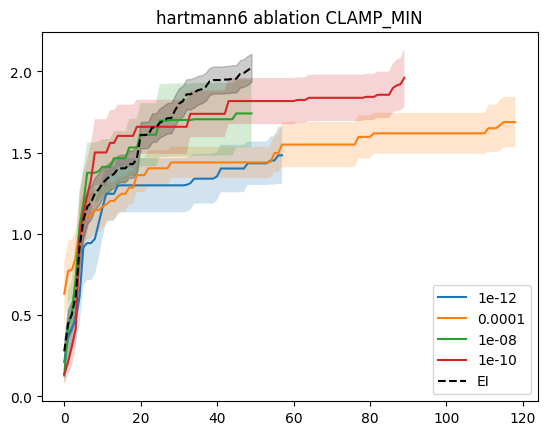

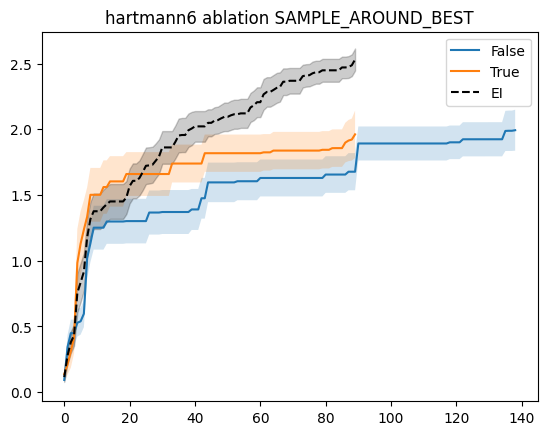

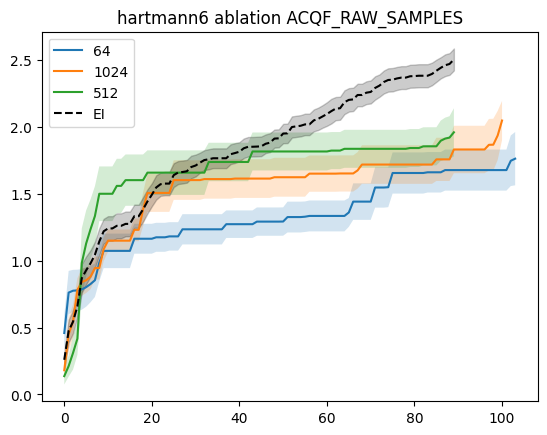

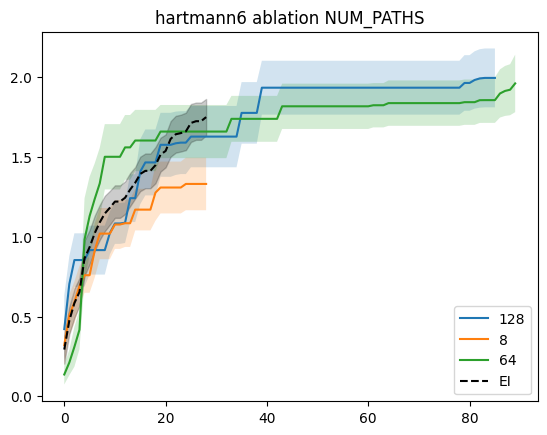

['results/ves/1724830112083_786971550_3', 'results/ves/1724830112149_786971550_8', 'results/ves/1724830121059_786971550_10', 'results/ves/1724830112406_786971550_6', 'results/ves/1724830111685_786971550_1', 'results/ves/1724830111766_786971550_5', 'results/ves/1724830111419_786971550_4', 'results/ves/1724830112837_786971550_2', 'results/ves/1724830121984_786971550_9', 'results/ves/1724830113332_786971550_7']


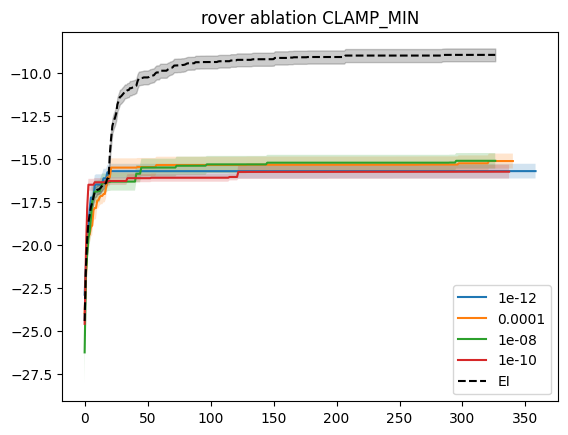

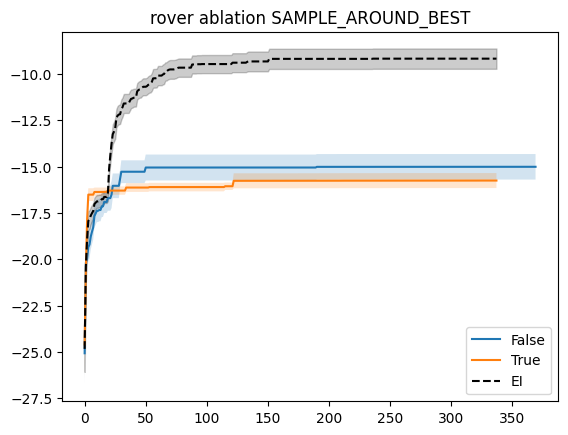

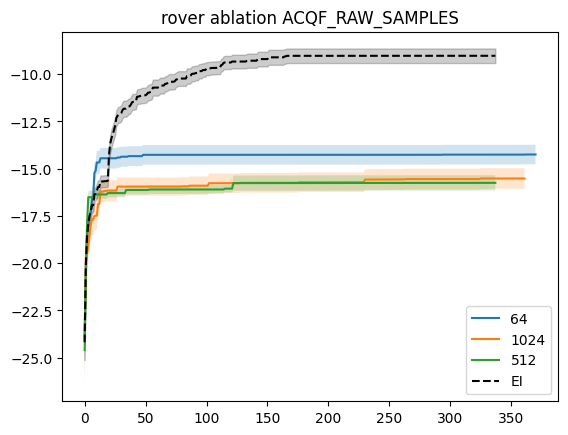

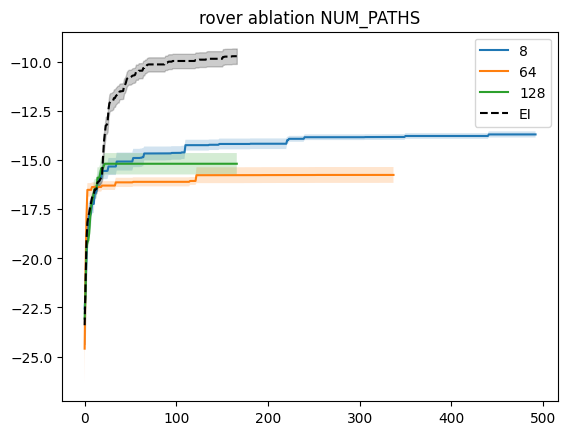

['results/ves/1724830137824_2784771065_5', 'results/ves/1724830131504_2784771065_3', 'results/ves/1724830138027_2784771065_6', 'results/ves/1724830137844_2784771065_7', 'results/ves/1724830131132_2784771065_8', 'results/ves/1724830131259_2784771065_10', 'results/ves/1724830131930_2784771065_9', 'results/ves/1724830129535_2784771065_4', 'results/ves/1724830137874_2784771065_2', 'results/ves/1724830137830_2784771065_1']


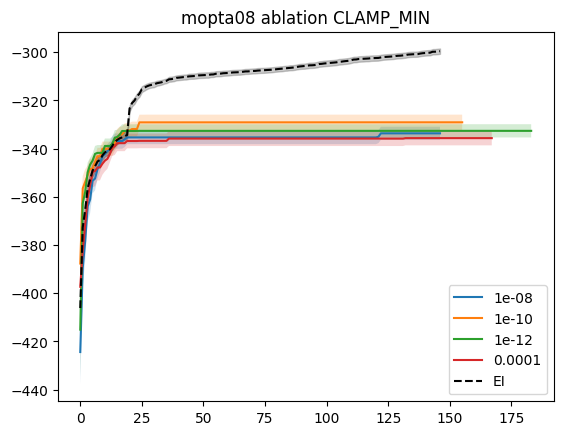

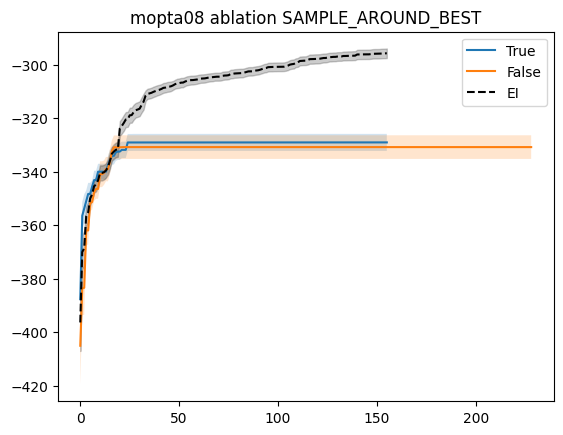

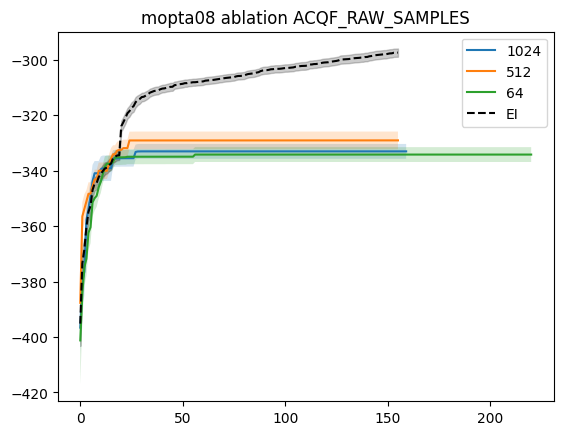

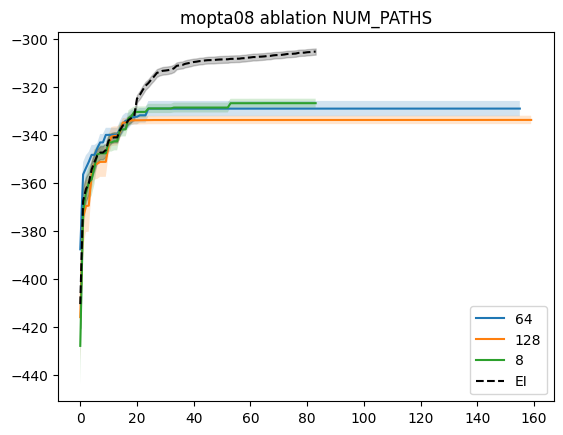

In [37]:
benchmarks = ['hartmann6', 'rover', 'mopta08']

run_dirs = glob.glob('results/ves/*')

for benchmark in benchmarks:
    relevant_dirs = [d for d in run_dirs if json.load(open(f'{d}/args.json'))['benchmark'] == benchmark]


    def def_dir_match(
            args: dict
    ):
        return args['clamp_min'] == 1e-10 \
            and args['sample_around_best'] == True \
            and args['acqf_raw_samples'] == 512 \
            and args['num_paths'] == 64


    default_dirs = [d for d in relevant_dirs if def_dir_match(json.load(open(f'{d}/args.json')))]
    print(default_dirs)

    # ablation CLAMP_MIN
    fig, ax = plt.subplots()
    clamp_mins = [1e-4, 1e-8, 1e-12]
    ablation_dirs = [d for d in relevant_dirs if
                     json.load(open(f'{d}/args.json'))['clamp_min'] in clamp_mins] + default_dirs
    ablation_hashes = list(set([int(d.split('/')[-1].split('_')[1]) for d in ablation_dirs]))
    
    for h in ablation_hashes:
        dirs = [d for d in ablation_dirs if int(d.split('/')[-1].split('_')[1]) == h]
        ves_y = [np.maximum.accumulate(np.load(f'{d}/train_y_ves.npy')) for d in dirs]
        min_len = min([len(y) for y in ves_y])
        ves_y = [y[:min_len] for y in ves_y]
        ves_y = np.stack(ves_y).squeeze(-1)
        ves_y_mean = ves_y.mean(axis=0)
        ves_y_std = ves_y.std(axis=0)/ np.sqrt(len(ves_y))
        ax.plot(ves_y_mean, label=f'{json.load(open(f"{dirs[0]}/args.json"))["clamp_min"]}')
        ax.fill_between(np.arange(len(ves_y_mean)), ves_y_mean-ves_y_std, ves_y_mean+ves_y_std, alpha=0.2)
    ei_y = [np.maximum.accumulate(np.load(f'{d}/train_y_ei.npy')) for d in ablation_dirs]
    min_len = min([len(y) for y in ei_y])
    ei_y = [y[:min_len] for y in ei_y]
    ei_y = np.stack(ei_y).squeeze(-1)
    ei_y_mean = ei_y.mean(axis=0)
    ei_y_std = ei_y.std(axis=0)/ np.sqrt(len(ei_y))
    ax.plot(ei_y_mean, label='EI', color='black', linestyle='--')
    ax.fill_between(np.arange(len(ei_y_mean)), ei_y_mean-ei_y_std, ei_y_mean+ei_y_std, alpha=0.2, color='black')
    ax.legend()
    ax.set_title(f'{benchmark} ablation CLAMP_MIN')
    plt.show()
    
    # ablation SAMPLE_AROUND_BEST
    fig, ax = plt.subplots()
    sample_around_bests = [False]
    ablation_dirs = [d for d in relevant_dirs if
                     json.load(open(f'{d}/args.json'))['sample_around_best'] in sample_around_bests] + default_dirs
    ablation_hashes = list(set([int(d.split('/')[-1].split('_')[1]) for d in ablation_dirs]))
    
    for h in ablation_hashes:
        dirs = [d for d in ablation_dirs if int(d.split('/')[-1].split('_')[1]) == h]
        ves_y = [np.maximum.accumulate(np.load(f'{d}/train_y_ves.npy')) for d in dirs]
        min_len = min([len(y) for y in ves_y])
        ves_y = [y[:min_len] for y in ves_y]
        ves_y = np.stack(ves_y).squeeze(-1)
        ves_y_mean = ves_y.mean(axis=0)
        ves_y_std = ves_y.std(axis=0)/ np.sqrt(len(ves_y))
        ax.plot(ves_y_mean, label=f'{json.load(open(f"{dirs[0]}/args.json"))["sample_around_best"]}')
        ax.fill_between(np.arange(len(ves_y_mean)), ves_y_mean-ves_y_std, ves_y_mean+ves_y_std, alpha=0.2)
    ei_y = [np.maximum.accumulate(np.load(f'{d}/train_y_ei.npy')) for d in ablation_dirs]
    min_len = min([len(y) for y in ei_y])
    ei_y = [y[:min_len] for y in ei_y]
    ei_y = np.stack(ei_y).squeeze(-1)
    ei_y_mean = ei_y.mean(axis=0)
    ei_y_std = ei_y.std(axis=0)/ np.sqrt(len(ei_y))
    ax.plot(ei_y_mean, label='EI', color='black', linestyle='--')
    ax.fill_between(np.arange(len(ei_y_mean)), ei_y_mean-ei_y_std, ei_y_mean+ei_y_std, alpha=0.2, color='black')
    ax.legend()
    ax.set_title(f'{benchmark} ablation SAMPLE_AROUND_BEST')
    plt.show()
    
    # ablation ACQF_RAW_SAMPLES
    fig, ax = plt.subplots()
    acqf_raw_samples = [64, 1024]
    ablation_dirs = [d for d in relevant_dirs if
                     json.load(open(f'{d}/args.json'))['acqf_raw_samples'] in acqf_raw_samples] + default_dirs
    ablation_hashes = list(set([int(d.split('/')[-1].split('_')[1]) for d in ablation_dirs]))
    
    for h in ablation_hashes:
        dirs = [d for d in ablation_dirs if int(d.split('/')[-1].split('_')[1]) == h]
        ves_y = [np.maximum.accumulate(np.load(f'{d}/train_y_ves.npy')) for d in dirs]
        min_len = min([len(y) for y in ves_y])
        ves_y = [y[:min_len] for y in ves_y]
        ves_y = np.stack(ves_y).squeeze(-1)
        ves_y_mean = ves_y.mean(axis=0)
        ves_y_std = ves_y.std(axis=0)/ np.sqrt(len(ves_y))
        ax.plot(ves_y_mean, label=f'{json.load(open(f"{dirs[0]}/args.json"))["acqf_raw_samples"]}')
        ax.fill_between(np.arange(len(ves_y_mean)), ves_y_mean-ves_y_std, ves_y_mean+ves_y_std, alpha=0.2)
    ei_y = [np.maximum.accumulate(np.load(f'{d}/train_y_ei.npy')) for d in ablation_dirs]
    min_len = min([len(y) for y in ei_y])
    ei_y = [y[:min_len] for y in ei_y]
    ei_y = np.stack(ei_y).squeeze(-1)
    ei_y_mean = ei_y.mean(axis=0)
    ei_y_std = ei_y.std(axis=0)/ np.sqrt(len(ei_y))
    ax.plot(ei_y_mean, label='EI', color='black', linestyle='--')
    ax.fill_between(np.arange(len(ei_y_mean)), ei_y_mean-ei_y_std, ei_y_mean+ei_y_std, alpha=0.2, color='black')
    ax.legend()
    ax.set_title(f'{benchmark} ablation ACQF_RAW_SAMPLES')
    plt.show()
    
    # ablation NUM_PATHS
    fig, ax = plt.subplots()
    num_paths = [8, 128]
    ablation_dirs = [d for d in relevant_dirs if
                     json.load(open(f'{d}/args.json'))['num_paths'] in num_paths] + default_dirs
    ablation_hashes = list(set([int(d.split('/')[-1].split('_')[1]) for d in ablation_dirs]))
    
    for h in ablation_hashes:
        dirs = [d for d in ablation_dirs if int(d.split('/')[-1].split('_')[1]) == h]
        ves_y = [np.maximum.accumulate(np.load(f'{d}/train_y_ves.npy')) for d in dirs]
        min_len = min([len(y) for y in ves_y])
        ves_y = [y[:min_len] for y in ves_y]
        ves_y = np.stack(ves_y).squeeze(-1)
        ves_y_mean = ves_y.mean(axis=0)
        ves_y_std = ves_y.std(axis=0)/ np.sqrt(len(ves_y))
        ax.plot(ves_y_mean, label=f'{json.load(open(f"{dirs[0]}/args.json"))["num_paths"]}')
        ax.fill_between(np.arange(len(ves_y_mean)), ves_y_mean-ves_y_std, ves_y_mean+ves_y_std, alpha=0.2)
    ei_y = [np.maximum.accumulate(np.load(f'{d}/train_y_ei.npy')) for d in ablation_dirs]
    min_len = min([len(y) for y in ei_y])
    ei_y = [y[:min_len] for y in ei_y]
    ei_y = np.stack(ei_y).squeeze(-1)
    ei_y_mean = ei_y.mean(axis=0)
    ei_y_std = ei_y.std(axis=0)/ np.sqrt(len(ei_y))
    
    ax.plot(ei_y_mean, label='EI', color='black', linestyle='--')
    ax.fill_between(np.arange(len(ei_y_mean)), ei_y_mean-ei_y_std, ei_y_mean+ei_y_std, alpha=0.2, color='black')
    ax.legend()
    ax.set_title(f'{benchmark} ablation NUM_PATHS')
    plt.show()
    
    